In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [34]:
# Load the datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [35]:
# Check the format of date columns
print("SignupDate format in Customers dataset:")
print(customers['SignupDate'].head(), "\n")

SignupDate format in Customers dataset:
0    2022-07-10
1    2022-02-13
2    2024-03-07
3    2022-10-09
4    2022-08-15
Name: SignupDate, dtype: object 



In [36]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [37]:
# ---- Data Overview ----
print("Customers Dataset:")
print(customers.info(), "\n")
print(customers.head(), "\n")

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None 

  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15 



In [38]:
print("Products Dataset:")
print(products.info(), "\n")
print(products.head(), "\n")

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 



In [39]:
print("Transactions Dataset:")
print(transactions.info(), "\n")
print(transactions.head(), "\n")


Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None 

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087 

EDA

1. Customers: Distribution by *Region*

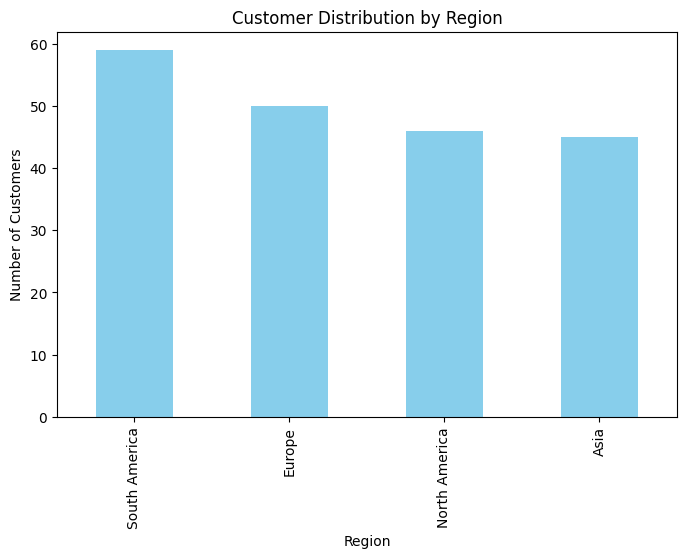

In [40]:
region_distribution = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
region_distribution.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

2. **Products: Most Popular Categories**




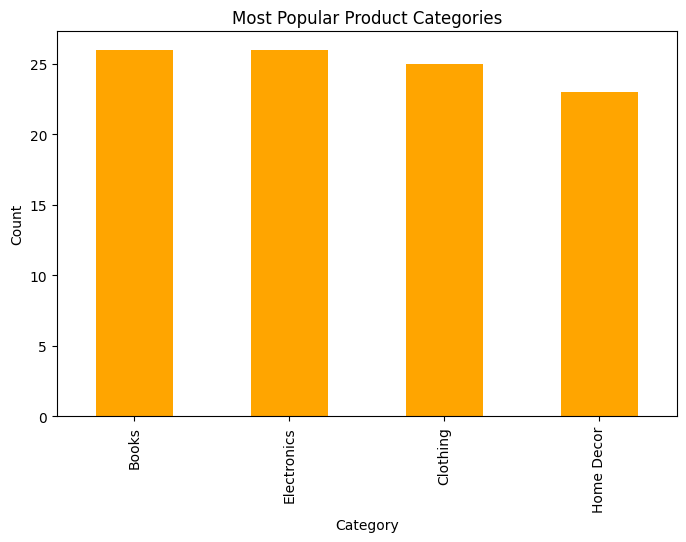

In [41]:
category_distribution = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
category_distribution.plot(kind='bar', color='orange')
plt.title('Most Popular Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

3. **Transactions: Sales Trends Over Time**



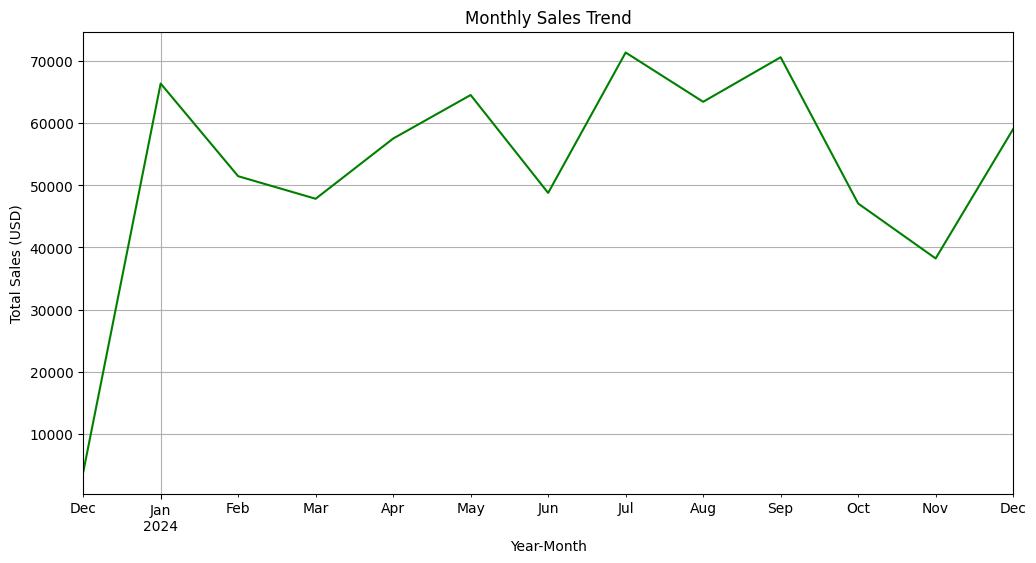

In [42]:
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
sales_trend = transactions.groupby('YearMonth')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
sales_trend.plot(color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()

4. **High-Value Customers**

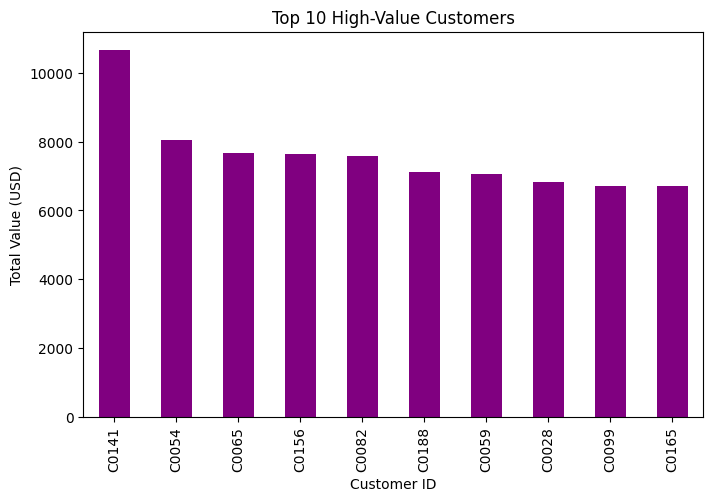

In [43]:
high_value_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
high_value_customers.plot(kind='bar', color='purple')
plt.title('Top 10 High-Value Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Value (USD)')
plt.show()

5. **Average Transaction Value by Category**

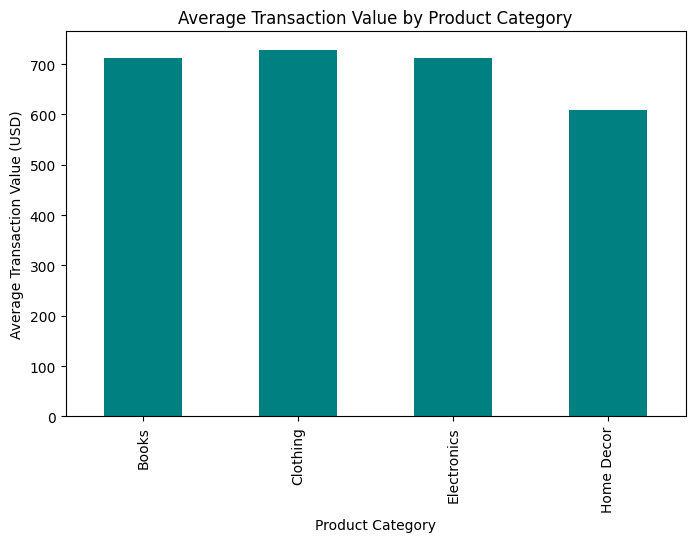

In [44]:
avg_transaction_value = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].mean()
plt.figure(figsize=(8, 5))
avg_transaction_value.plot(kind='bar', color='teal')
plt.title('Average Transaction Value by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Transaction Value (USD)')
plt.show()

**Insights**

In [45]:
insights = [
    "1. The region with the highest customer base is {} with {} customers.".format(region_distribution.idxmax(), region_distribution.max()),
    "2. The most popular product category is '{}' with {} products sold.".format(category_distribution.idxmax(), category_distribution.max()),
    "3. Monthly sales peaked in {} with total sales of ${:.2f}.".format(sales_trend.idxmax(), sales_trend.max()),
    "4. The top customer (ID: {}) contributed ${:.2f} to the total revenue.".format(high_value_customers.idxmax(), high_value_customers.max()),
    "5. The average transaction value is ${:.2f}, indicating customer spending habits.".format(transactions['TotalValue'].mean()),
    "6. The category with the highest average transaction value is '{}' with an average of ${:.2f}.".format(avg_transaction_value.idxmax(), avg_transaction_value.max())
]

In [46]:
print("\nBusiness Insights:")
for i, insight in enumerate(insights, 1):
    print(f" {insight}")



Business Insights:
 1. The region with the highest customer base is South America with 59 customers.
 2. The most popular product category is 'Books' with 26 products sold.
 3. Monthly sales peaked in 2024-07 with total sales of $71366.39.
 4. The top customer (ID: C0141) contributed $10673.87 to the total revenue.
 5. The average transaction value is $690.00, indicating customer spending habits.
 6. The category with the highest average transaction value is 'Clothing' with an average of $728.82.
